In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [93]:
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해 줍니다. 차후 버전관리를 위해 필요한 정보라고 생각하시면 주석처리 하시면 됩니다.

In [97]:
import matplotlib.font_manager as fm
# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmex10',
 'STIXSizeOneSym',
 'cmr10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'cmsy10',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmss10',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmmi10',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmb10',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'Bahnschrift',
 'Candara',
 'Calibri',
 'Segoe UI Historic',
 'Microsoft PhagsPa',
 'Segoe MDL2 Assets',
 'Segoe UI',
 'Nirmala UI',
 'Constantia',
 'HyhwpEQ',
 'Candara',
 'Malgun Gothic',
 'Ebrima',
 'NewJumja',
 'Mongolian Baiti',
 'Segoe UI Emoji',
 'Malgun Gothic',
 'Georgia',
 'Constantia',
 'Verdana',
 'Webdings',
 'Georgia',
 'Ebri

In [27]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# family size 별 생존 확률

In [30]:
del df['class']
del df['embark_town']
del df['alive']
del df['deck']

In [33]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,True


In [34]:
# family column 생성 : 가족 수 데이터
df['family'] = 1 + df['sibsp'] + df['parch']
df

## histplot으로 표현
가족 단위별 생존 비율 그래프

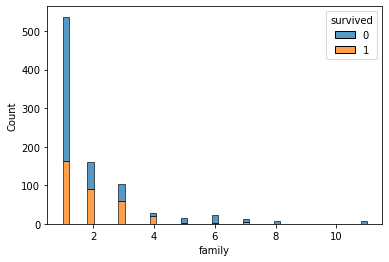

In [36]:
# histplot으로 표현
sns.histplot(data=df, x="family", multiple="stack", hue="survived", );

## kdeplot으로 표현
- 가족 구성 인원의 나이 밀집도 표현

In [51]:
# age가 Nan인 row 모두 삭제
df.dropna(axis=0, how='any', inplace=True)
df.reset_index()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,family
0,0,3,male,22.0,1,0,7.2500,S,man,True,False,2
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False,2
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True,1
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False,2
4,0,3,male,35.0,0,0,8.0500,S,man,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,woman,False,False,6
886,0,2,male,27.0,0,0,13.0000,S,man,True,True,1
887,1,1,female,19.0,0,0,30.0000,S,woman,False,True,1
889,1,1,male,26.0,0,0,30.0000,C,man,True,True,1


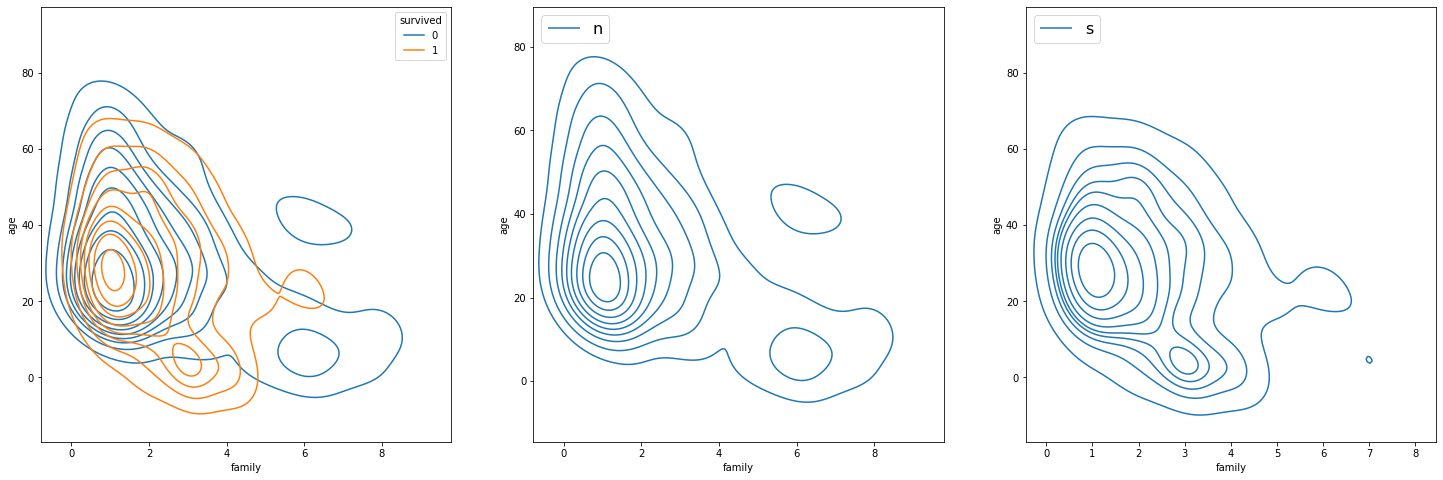

In [82]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
sns.kdeplot(x=df['family'], y=df['age'], hue=df['survived'])
plt.subplot(1, 3, 2)
sns.kdeplot(x=df[df['survived']==0]['family'], y=df['age'])
plt.legend('not survived', loc=2, prop={'size': 16})
plt.subplot(1, 3, 3)
sns.kdeplot(x=df[df['survived']==1]['family'], y=df['age'])
# plt.legend('survived')
plt.legend('survived', loc=2, prop={'size': 16})
plt.show()


## relplot으로 표현
- 가족 단위 별 나이 분포도 확인 가능

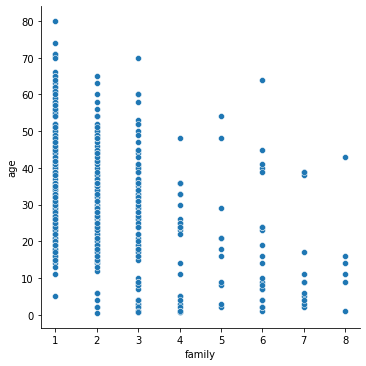

In [67]:
sns.relplot(x='family', y='age', data=df) 

# 탑승 항구와 좌석 등급 비교

In [83]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [84]:
df.isna().sum()  # null 값 을 세는 것 isna

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## catplot(1)

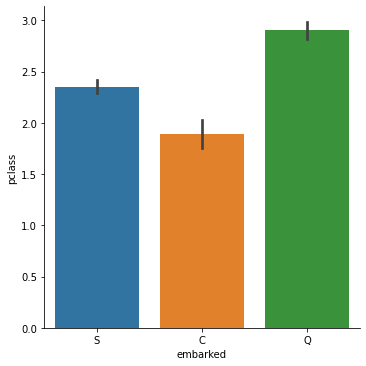

In [85]:
sns.catplot(x='embarked',y='pclass', kind='bar', data =df);


## countplot

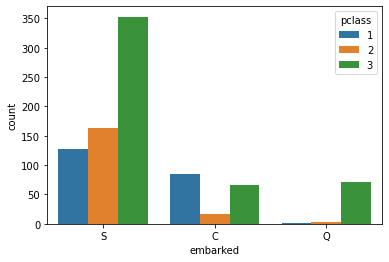

In [86]:
sns.countplot(x='embarked', hue='pclass', data =df);


### 그래프 분석
출발지역에 따른 선실등급 배치 상황 <br>
Southampton에 3등급 승객이 다수 <br>
Cherbourg에 1 등급 승객이 다수 <br>

## catplot(2)


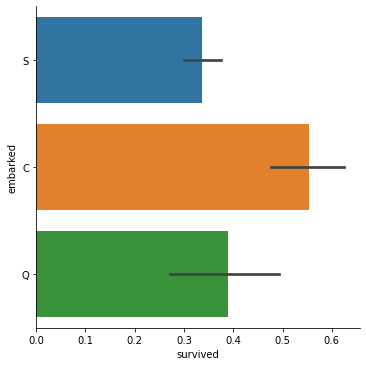

In [87]:
sns.catplot(x='survived', y='embarked', kind='bar', data=df);

### 그래프 분석
Cherbourg 지역에서 1 등급 선객의 사람이 많이 타서 Survived rate 이 높다.

## catplot(3)

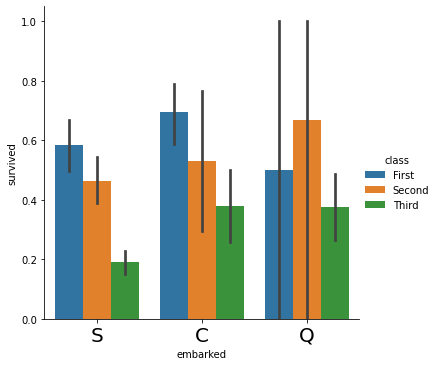

In [92]:
sns.catplot(x="embarked", y="survived", hue="class", kind="bar", data=df);

### 그래프 분석

Queens town에서 탄 2등급과 3 등급 사람들의 생존율이 다른 곳 보다 높다.

# 연령층별 생존 인원

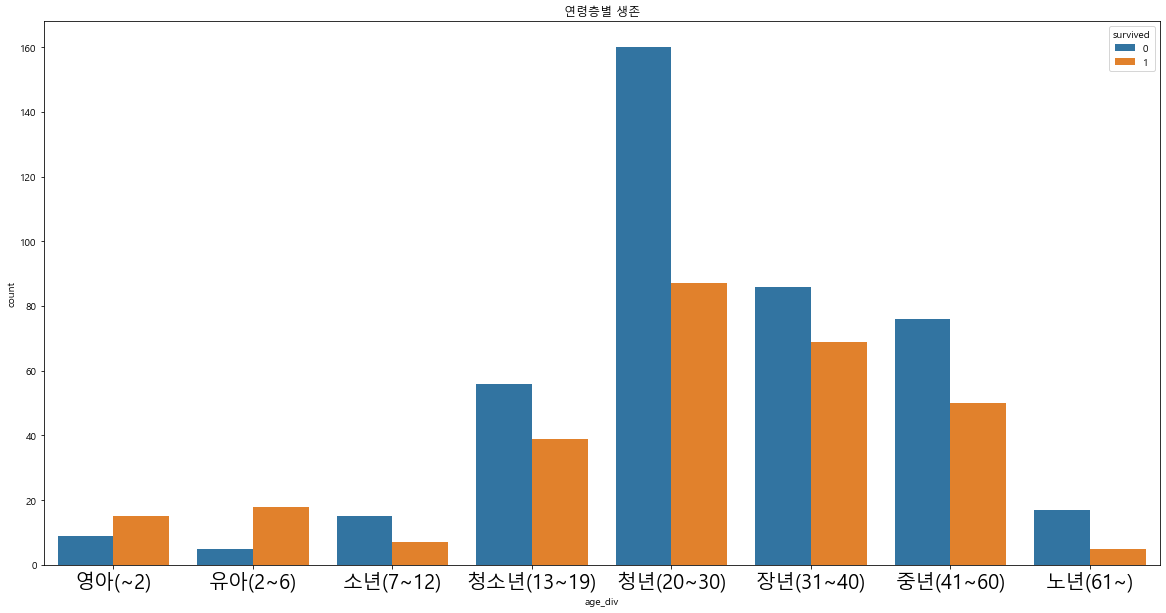

In [100]:
df_age = df[~df.age.isna()][["survived", "age"]]
bins = [0, 3, 7, 13, 20, 31, 41, 61, 100]
bins_label = ["영아(~2)", "유아(2~6)", "소년(7~12)", "청소년(13~19)", "청년(20~30)", "장년(31~40)", "중년(41~60)", "노년(61~)", ""]
df_age["age_div"] = pd.cut(df_age.age, bins, right=False, labels=bins_label[:-1])
df_age.age = df_age.age_div.astype(object)
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot('age_div', hue='survived', data=df_age, ax=ax)
ax.set_title('연령층별 생존')
plt.rc("xtick", labelsize=20)
plt.show()